In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy.stats as ss
import scipy.linalg as slinalg
import matplotlib.pyplot as plt

## Behavior: $tr(W\Omega^{-1}W^{T})$

###### linearly dependent: change off diagonal

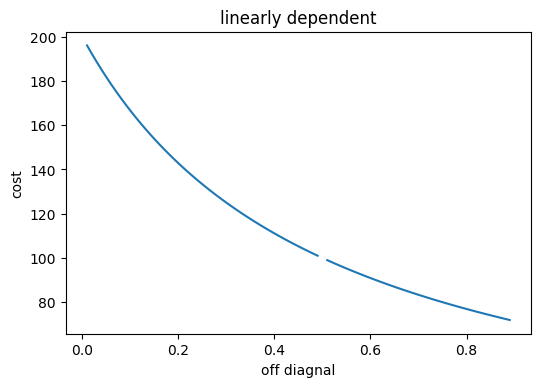

In [35]:
w = np.array([[5,5],
             [5,5]])

x = np.arange(0.01,0.9,0.01)
cost = []

for xx in x:
    omega = np.array([
        [0.5, xx,],
        [xx, 0.5,]
    ])
 
    try:
        c = np.trace(np.matmul(w, np.matmul(np.linalg.inv(omega), w.T)))
    except:
        c = np.nan
    cost.append(c)
    
plt.plot(x, cost)
plt.xlabel("off diagnal")
plt.ylabel("cost")
plt.title("linearly dependent")

###### linearly dependent: diagonal

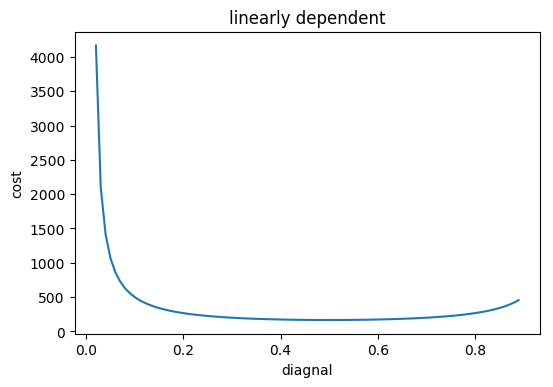

In [13]:
w = np.array([[5,5],
             [5,5]])

x = np.arange(0.01,0.9,0.01)
cost = []
for xx in x:

    omega = np.array([
        [xx, 0.1,],
        [0.1, 1-xx,]
    ])
 
    try:
        c = np.trace(np.matmul(w, np.matmul(np.linalg.inv(omega), w.T)))
    except:
        c = np.nan
    cost.append(c)
    
plt.plot(x[1:], cost[1:])
plt.xlabel("diagnal")
plt.ylabel("cost")
plt.title("linearly dependent")


###### linearly independent: change off diagonal

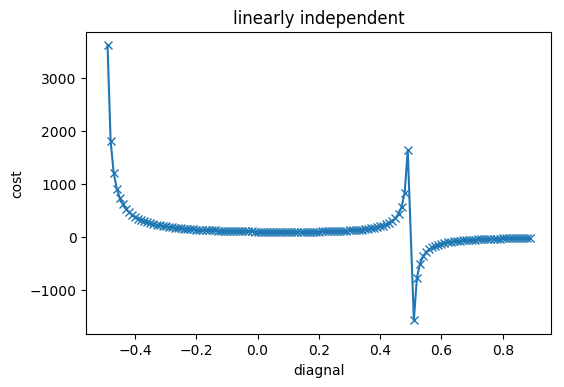

In [187]:
w = np.array([[5,1],
             [1,5]])

x = np.arange(-0.5,0.9,0.01)
x = x[~np.isclose(x,0.5)] 
cost = []
for xx in x:

    omega = np.array([
        [0.5, xx,],
        [xx, 0.5,]
    ])
#     print np.linalg.eig(omega)[0]
    try:
        c = np.trace(np.matmul(w, np.matmul(np.linalg.inv(omega), w.T)))
    except:
        c = np.nan
    cost.append(c)
    
plt.plot(x[1:], cost[1:], 'x-')
plt.xlabel("diagnal")
plt.ylabel("cost")
plt.title("linearly independent")

###### linearly independent: diagonal

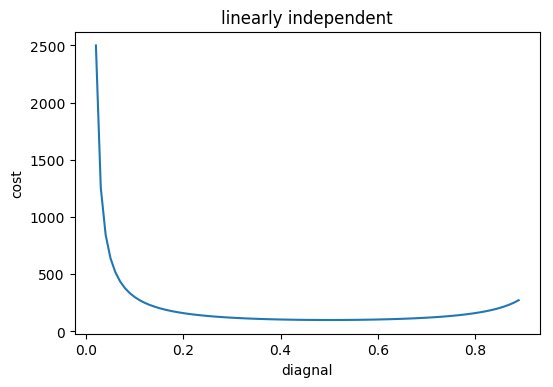

In [17]:
w = np.array([[5,1],
             [1,5]])

x = np.arange(0.01,0.9,0.01)
cost = []
for xx in x:

    omega = np.array([
        [xx, 0.1,],
        [0.1, 1-xx,]
    ])
 
    try:
        c = np.trace(np.matmul(w, np.matmul(np.linalg.inv(omega), w.T)))
    except:
        c = np.nan
    cost.append(c)
    
plt.plot(x[1:], cost[1:])
plt.xlabel("diagnal")
plt.ylabel("cost")
plt.title("linearly independent")

###### TakeAway
if linearly dependent
- increase off-diagonal of $\Omega$, decrease the trace
- diagonal of $\Omega$ approaches 0.5 (i.e. $\frac{1}{dim(\Omega)}$), decrease the trace

if linearly independent
- decrease off-diagonal of $\Omega$, decrease the trace
- diagonal of $\Omega$ approaches 0.5 (i.e. $\frac{1}{dim(\Omega)}$), decrease the trace

## Fix $\Omega$, update W

[0.9472136 0.0527864]


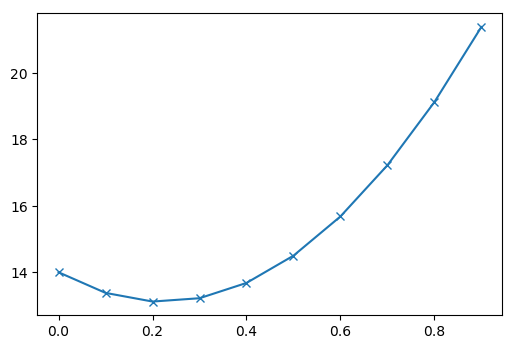

In [141]:
sig = 0.2
Omega = np.array([
    [0.9, sig],
    [sig, 0.1]
])
print np.linalg.eig(Omega)[0]

w0 = [1,1]
x = np.arange(0,1,0.1)
w = [[1,i] for i in x]
cost = []
for ww in w:
    W = np.vstack((w0,ww)).T
    try:
        c = np.trace(np.matmul(W, np.matmul(np.linalg.inv(Omega), W.T)))
    except:
        c = np.nan
        
    cost.append(c)
plt.plot(x, cost,'x-')

In [ ]:
def getSim(w):
    A = np.real(slinalg.sqrtm(np.matmul(w.T, w)))
    A = A/np.trace(A)
    return A

In [78]:
for i in np.arange(-1,1,0.2):
    w = np.array([
        [1,1,i,],
        [1,1,1,]
        ])

    wa = w[:,[0,1]]
    wa = wa#/np.linalg.norm(wa, axis=0)
    wb = w[:,[0,2]]
    wb = wb#/np.linalg.norm(wb, axis=0)

    A = getSim(wa) #Similarity derived by linearly dependent w
    B = getSim(wb) #Similarity derived by linearly independent w
    
    try:
        print "==={}===".format(i)
        print wb[:,-1]
        print "==Use Omega from dependent w=="
        print "cost: {} vs. {}".format(get_trace(A, wa), get_trace(A, wb))
        print "==Use Omega from independent w=="
        print "cost: {} vs. {}".format(get_trace(B, wa), get_trace(B, wb))
        print "\n"
    except:
        pass

===-1.0===
[-1.  1.]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 189812535.497
==Use Omega from independent w==
cost: 8.0 vs. 8.0


===-0.8===
[-0.8  1. ]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 153748154.153
==Use Omega from independent w==
cost: 7.6 vs. 7.24


===-0.6===
[-0.6  1. ]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 121480023.518
==Use Omega from independent w==
cost: 7.2 vs. 6.56


===-0.4===
[-0.4  1. ]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 93008143.5935
==Use Omega from independent w==
cost: 6.8 vs. 5.96


===-0.2===
[-0.2  1. ]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 68332514.3789
==Use Omega from independent w==
cost: 6.4 vs. 5.44


===-2.22044604925e-16===
[-2.22044605e-16  1.00000000e+00]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 47453135.8743
==Use Omega from independent w==
cost: 6.0 vs. 5.0


===0.2===
[0.2 1. ]
==Use Omega from dependent w==
cost: 4.00000004215 vs. 30370008.0795
==U

###### TakeAway
if $\Omega$ is derived from linearly dependent
- forcing W to be linearly dependent decreases the trace

if $\Omega$ is derived from linearly independent
- forcing W to be linearly independent decreases the trace

# Information behind $\Omega\ 

In [23]:
np.random.seed(0)
w1 = np.random.normal(loc=10,size=(100,2))
loc2 = 5
w2 = np.random.normal(loc=loc2,size=(100,2))
w = np.vstack((w1,w2)).T

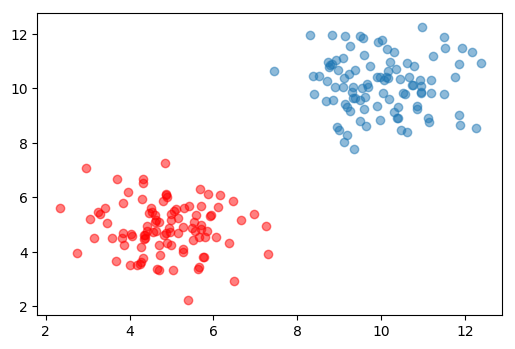

In [24]:
plt.scatter(w1[:,0], w1[:,1], alpha=0.5)
plt.scatter(w2[:,0], w2[:,1], c='r', alpha=0.5)

In [25]:
A = np.real(slinalg.sqrtm(np.matmul(w.T, w)))
A = A/np.trace(A)

def get_trace(Sigma, W):
    """
    equation
        Omega^{-1}W.T = Y
    solve for Y by
        W.T = OmegaY
    """
    Omegainv_Wtrans = np.real(slinalg.solve(Sigma, W.T ))
    trace_ = np.real(np.trace(np.matmul(W, Omegainv_Wtrans)))
    return trace_

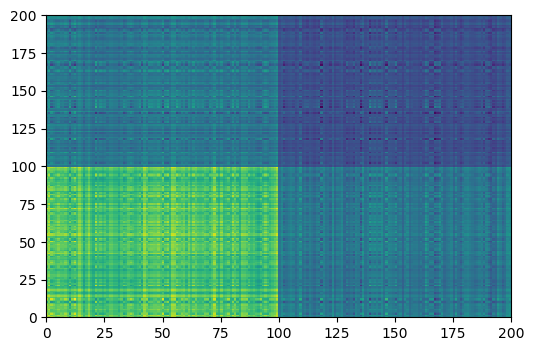

In [26]:
plt.pcolor(A)

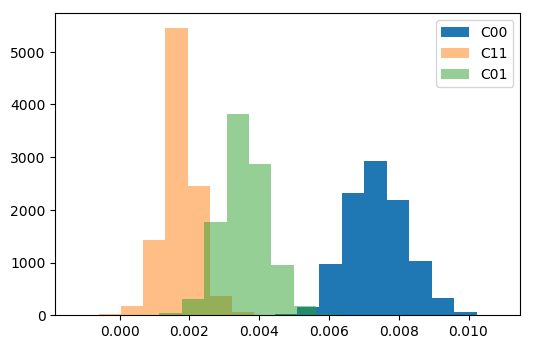

In [27]:
plt.hist(A[:100,:100].reshape(-1))
plt.hist(A[100:,100:].reshape(-1), alpha=0.5)
plt.hist(A[100:,:100].reshape(-1), alpha=0.5)
plt.legend(["C00", "C11", "C01"])

###### Effect of dimentionality of weight space

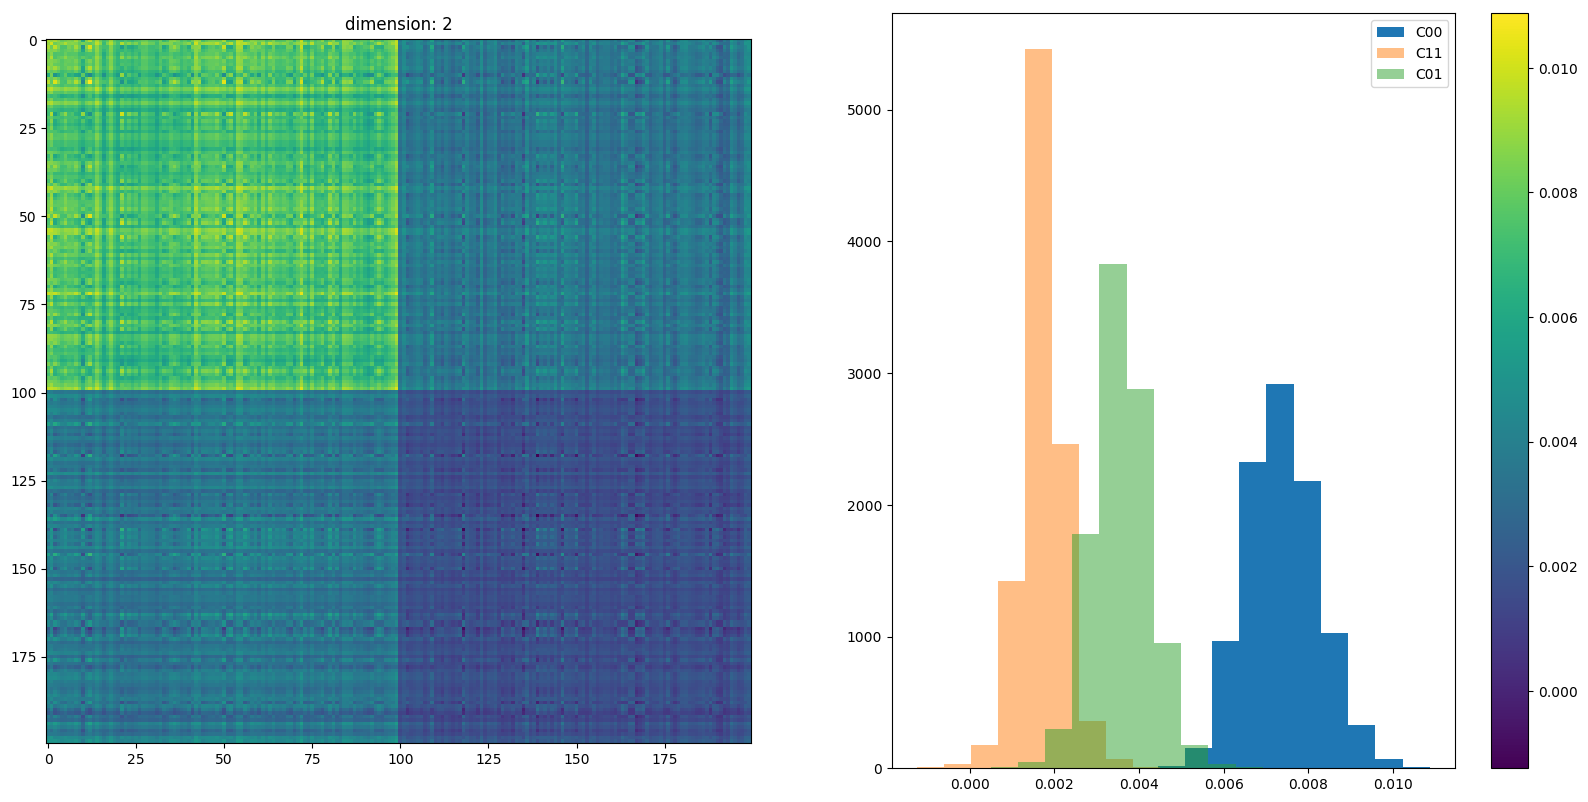

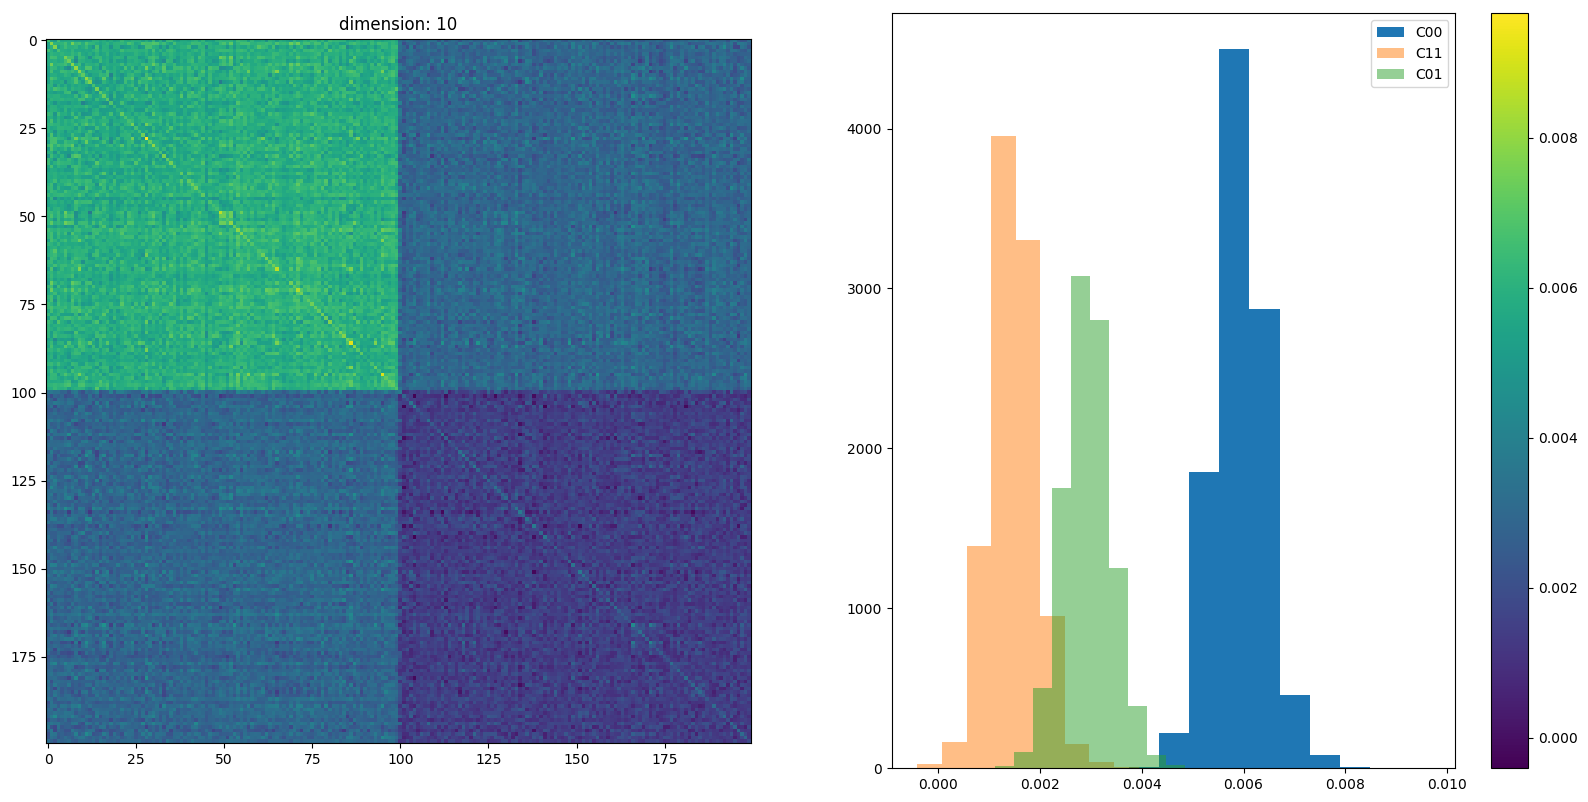

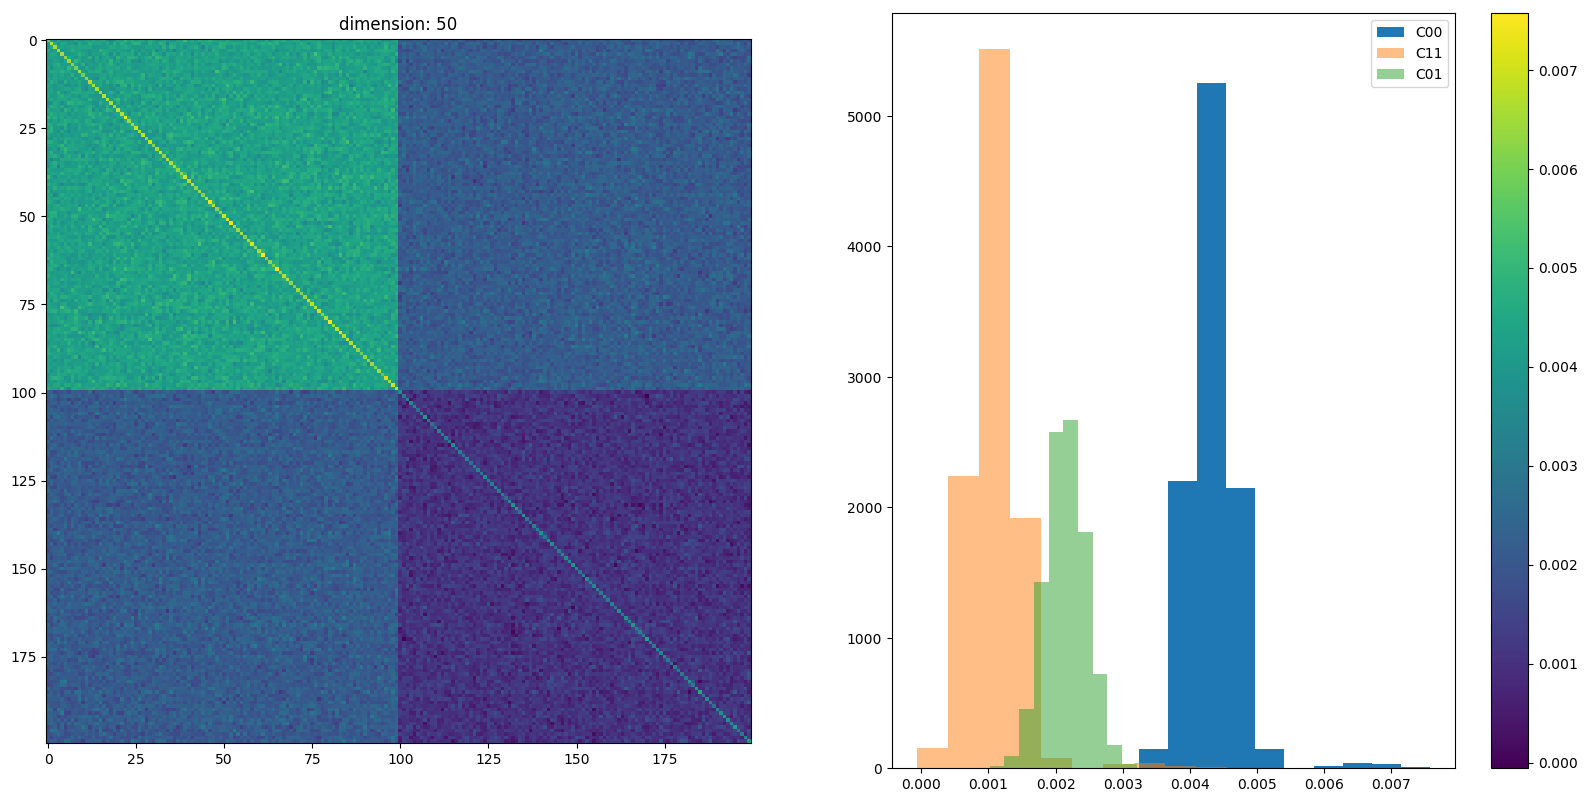

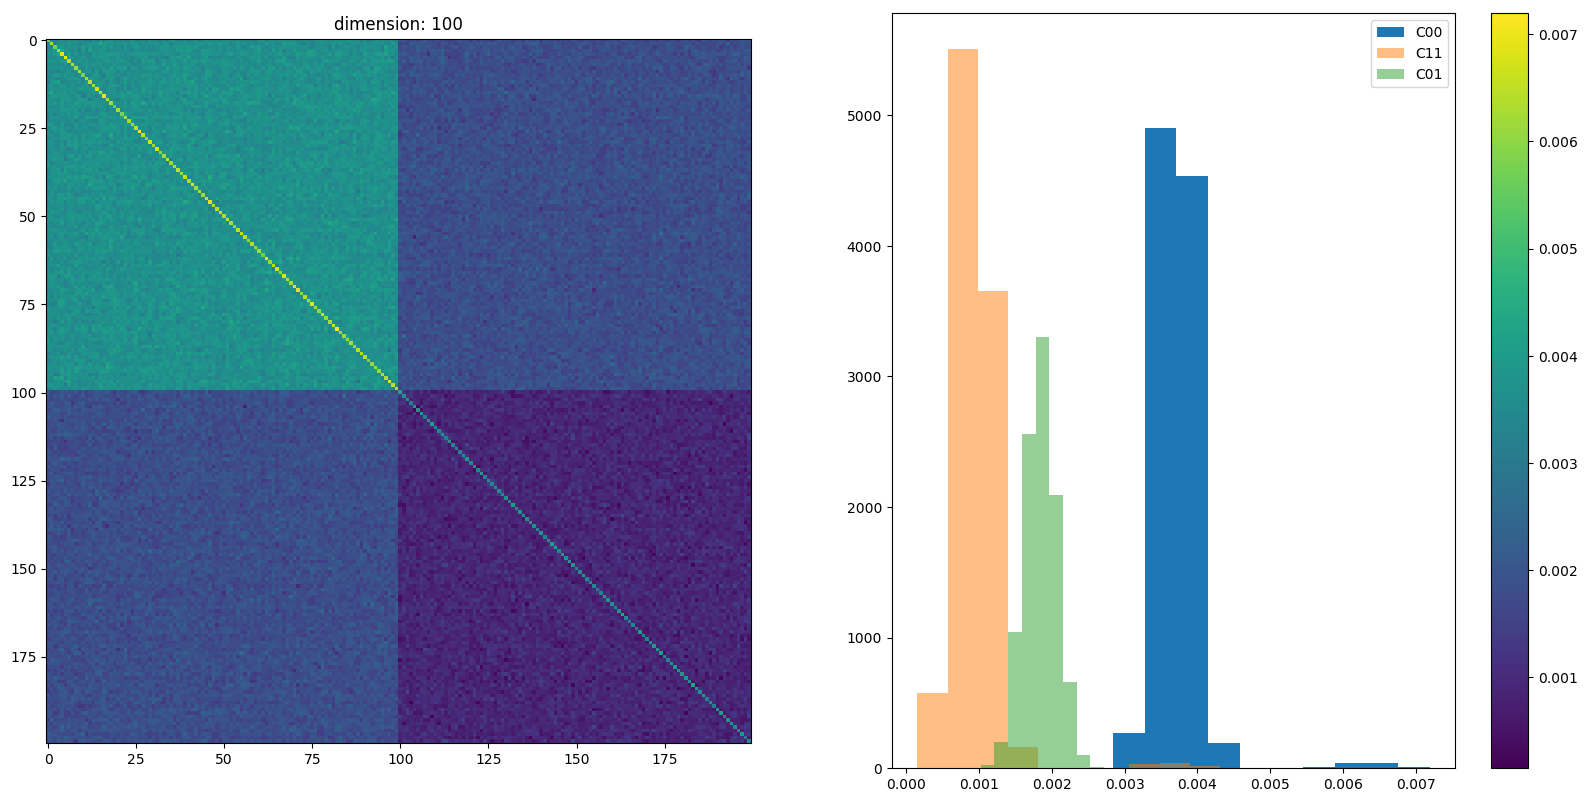

In [30]:
np.random.seed(0)
for d in [2,10,50,100]:
    loc1 = 10
    loc2 = 5
    w1 = np.random.normal(loc=loc1,size=(100,d))
    w2 = np.random.normal(loc=loc2,size=(100,d))
    w = np.vstack((w1,w2)).T
    A = np.real(slinalg.sqrtm(np.matmul(w.T, w)))
    A = A/np.trace(A)
    fig, ax = plt.subplots(1,2, figsize=(20,10))
    
    cax = ax[0].imshow(A)
    
    fig.colorbar(cax)
    ax[0].set_title("dimension: {}".format(d))
    
    ax[1].hist(A[:100,:100].reshape(-1))
    ax[1].hist(A[100:,100:].reshape(-1), alpha=0.5)
    ax[1].hist(A[100:,:100].reshape(-1), alpha=0.5)
    ax[1].legend(["C00", "C11", "C01"])

(array([33., 44., 22.,  1.,  0.,  0.,  7., 47., 33., 13.]),
 array([0.00303042, 0.00344694, 0.00386346, 0.00427998, 0.0046965 ,
        0.00511302, 0.00552953, 0.00594605, 0.00636257, 0.00677909,
        0.00719561]),
 <a list of 10 Patch objects>)

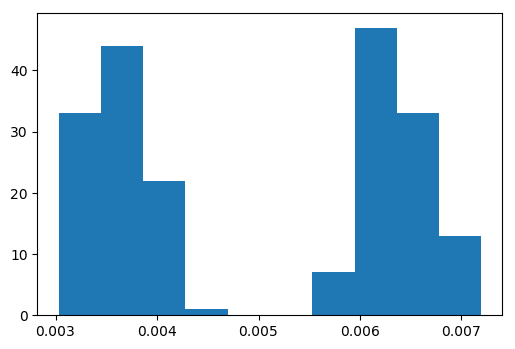

In [41]:
plt.hist(np.diag(A))